In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [162]:
df = pd.read_csv(r'D:\Yuri\Projects\webmaster_stability\webs.csv')
df_2 = pd.read_csv(r'D:\Yuri\Projects\webmaster_stability\webs.csv')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240785 entries, 0 to 240784
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ts_spawn_date  240785 non-null  object
 1   web_id         240784 non-null  object
 2   lead_qty       240785 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.5+ MB


## Days

In [164]:
df_days = df

In [165]:
df.describe()

,lead_qty
count,240785.000000
mean,60.935557
std,179.100450
min,1.000000
25%,2.000000
50%,8.000000
75%,42.000000
max,6734.000000


<AxesSubplot:xlabel='lead_qty'>

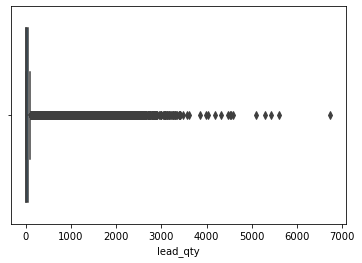

In [166]:
sns.boxplot(x='lead_qty', data=df_days)

In [253]:
df_days_cut = df_days[(df_days['lead_qty'] < 500) & (df_days['lead_qty'] > 5)]
df_days_cut.describe()

,lead_qty
count,132756.000000
mean,67.735665
std,89.630838
min,6.000000
25%,13.000000
50%,31.000000
75%,81.000000
max,499.000000


<AxesSubplot:xlabel='lead_qty'>

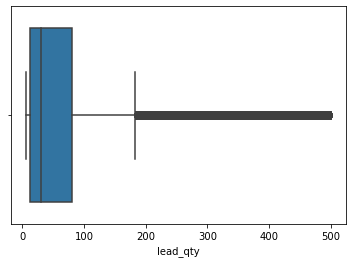

In [254]:
sns.boxplot(x='lead_qty', data=df_days_cut)

In [255]:
df_days_fullcut = df_days[(df_days['lead_qty'] < 86) & (df_days['lead_qty'] > 5)]
df_days_fullcut.describe()

,lead_qty
count,101101.000000
mean,27.526206
std,20.974809
min,6.000000
25%,10.000000
50%,20.000000
75%,40.000000
max,85.000000


<AxesSubplot:xlabel='lead_qty'>

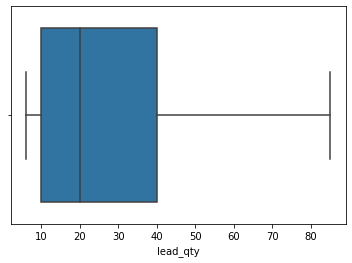

In [256]:
sns.boxplot(x='lead_qty', data=df_days_fullcut)

## Weaks

In [169]:
df_weaks = df_2

In [170]:
df_weaks['ts_spawn_date'] = pd.to_datetime(df_weaks['ts_spawn_date'], format="%Y/%m/%d")
df_weaks['ts_spawn_date'] = df_weaks['ts_spawn_date'].dt.to_period('W')

In [171]:
df_weaks = df_weaks.groupby(['ts_spawn_date', 'web_id'], as_index=False).agg({'lead_qty': sum})

In [173]:
df_weaks.describe()

,lead_qty
count,53412.000000
mean,274.701565
std,996.825552
min,1.000000
25%,3.000000
50%,17.000000
75%,131.000000
max,33767.000000


<AxesSubplot:xlabel='lead_qty'>

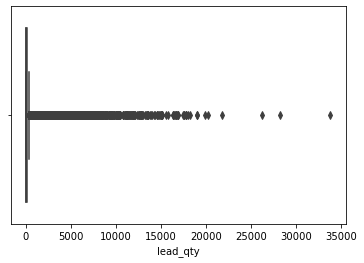

In [174]:
sns.boxplot(x='lead_qty', data=df_weaks)

In [225]:
df_weaks_cut = df_weaks[(df_weaks['lead_qty'] < 3500) & (df_weaks['lead_qty'] > 35)]
df_weaks_cut.describe()

,lead_qty
count,20473.000000
mean,447.425927
std,610.218382
min,36.000000
25%,80.000000
50%,197.000000
75%,527.000000
max,3498.000000


<AxesSubplot:xlabel='lead_qty'>

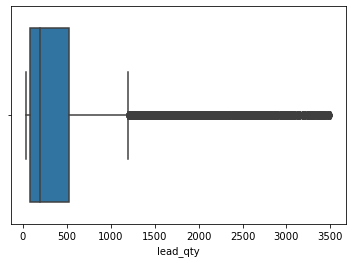

In [227]:
sns.boxplot(x='lead_qty', data=df_weaks_cut)

In [246]:
df_weaks_fullcut = df_weaks[(df_weaks['lead_qty'] < 502) & (df_weaks['lead_qty'] > 35)]
df_weaks_fullcut.describe()

,lead_qty
count,15120.000000
mean,165.362765
std,122.799515
min,36.000000
25%,64.000000
50%,123.000000
75%,239.000000
max,501.000000


<AxesSubplot:xlabel='lead_qty'>

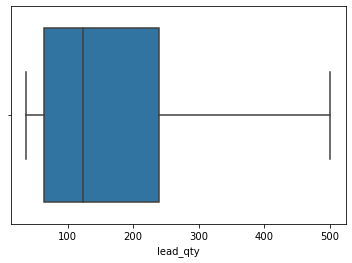

In [247]:
sns.boxplot(x='lead_qty', data=df_weaks_fullcut)

## Months

In [177]:
df_months = df

In [178]:
df_months['ts_spawn_date'] = pd.to_datetime(df_months['ts_spawn_date'], format="%Y/%m/%d")
df_months['ts_spawn_date'] = df_months['ts_spawn_date'].dt.to_period('M')

In [179]:
df_months = df_months.groupby(['ts_spawn_date', 'web_id'], as_index=False).agg({'lead_qty': sum})

In [180]:
df_months.describe()

,lead_qty
count,18082.000000
mean,811.434576
std,3494.870507
min,1.000000
25%,3.000000
50%,24.000000
75%,230.000000
max,108318.000000


<AxesSubplot:xlabel='lead_qty'>

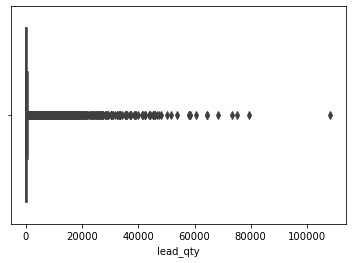

In [181]:
sns.boxplot(x='lead_qty', data=df_months)

In [248]:
df_months_cut = df_months[(df_months['lead_qty'] < 15000) & (df_months['lead_qty'] > 150)]
df_months_cut.describe()

,lead_qty
count,5065.000000
mean,1856.096150
std,2604.305915
min,151.000000
25%,331.000000
50%,794.000000
75%,2125.000000
max,14988.000000


<AxesSubplot:xlabel='lead_qty'>

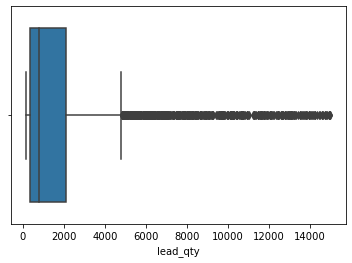

In [249]:
sns.boxplot(x='lead_qty', data=df_months_cut)

In [295]:
df_months_fullcut = df_months[(df_months['lead_qty'] < 2138) & (df_months['lead_qty'] > 150)]
df_months_fullcut.describe()

,lead_qty
count,3799.000000
mean,693.421953
std,519.096134
min,151.000000
25%,270.000000
50%,509.000000
75%,1013.000000
max,2125.000000


<AxesSubplot:xlabel='lead_qty'>

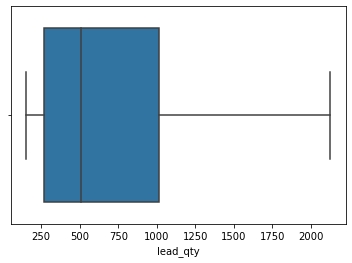

In [296]:
sns.boxplot(x='lead_qty', data=df_months_fullcut)

## Compare

In [328]:
compare_df = pd.DataFrame()

In [329]:
compare_df['days'] = df.describe()
compare_df['weaks'] = df_weaks.describe()
compare_df['months'] = df_months.describe()
compare_df['---------'] = ''
compare_df['days_cut'] = df_days_cut.describe()
compare_df['weaks_cut'] = df_weaks_cut.describe()
compare_df['months_cut'] = df_months_cut.describe()
compare_df['--------'] = ''
compare_df['days_fullcut'] = df_days_fullcut.describe()
compare_df['weaks_fullcut'] = df_weaks_fullcut.describe()
compare_df['months_fullcut'] = df_months_fullcut.describe()

In [330]:
round(compare_df)

,days,weaks,months,---------,days_cut,weaks_cut,months_cut,--------,days_fullcut,weaks_fullcut,months_fullcut
count,240785.0,53412.0,18082.0,,132756.0,20473.0,5065.0,,101101.0,15120.0,3799.0
mean,61.0,275.0,811.0,,68.0,447.0,1856.0,,28.0,165.0,693.0
std,179.0,997.0,3495.0,,90.0,610.0,2604.0,,21.0,123.0,519.0
min,1.0,1.0,1.0,,6.0,36.0,151.0,,6.0,36.0,151.0
25%,2.0,3.0,3.0,,13.0,80.0,331.0,,10.0,64.0,270.0
50%,8.0,17.0,24.0,,31.0,197.0,794.0,,20.0,123.0,509.0
75%,42.0,131.0,230.0,,81.0,527.0,2125.0,,40.0,239.0,1013.0
max,6734.0,33767.0,108318.0,,499.0,3498.0,14988.0,,85.0,501.0,2125.0


In [345]:
179*7/997 # неделя с выбросами

1.2567703109327983

In [346]:
179*30/3495 # месяц с выбросами

1.536480686695279

In [347]:
90*7/610 # неделя с частичными выбросами

1.0327868852459017

In [349]:
90*30/2604 # месяц с частичными выбросами

1.0368663594470047

In [350]:
21*7/123 # неделя без выбросов

1.1951219512195121

In [351]:
21*30/519 # месяц без выбросов

1.2138728323699421